In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [149]:
X1 = np.random.multivariate_normal([3, 5], [[1, 0.1], [0.1, 1]], 1000)

In [150]:
X2 = np.random.multivariate_normal([12, 3], [[12, 0.1], [0.1, 1]], 1000)

In [151]:
X3 = np.random.multivariate_normal([6, 6], [[12, 8], [8, 12]], 1000)

In [152]:
X = np.concatenate((X1, X2, X3))

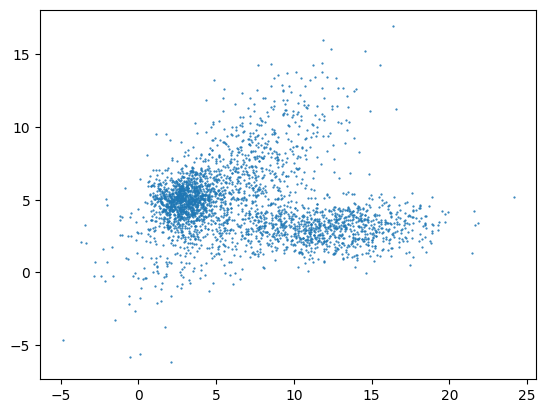

In [203]:
plt.scatter(X[:, 0], X[:, 1], s=0.3)

In [304]:
# E-M algorithm
import numpy as np

e_m_steps = 5
n_clusters = 3
prior = np.ones(n_clusters) / n_clusters

# Init clusters
clusters = {}
x_extent = X[:, 0].min(), X[:, 0].max()
y_extent = X[:, 1].min(), X[:, 1].max()
for i in range(n_clusters):
    mu_x, mu_y = np.random.random(2)
    mu_x = (x_extent[1] - x_extent[0]) * mu_x + x_extent[0]
    mu_y = (y_extent[1] - y_extent[0]) * mu_y + y_extent[0]
    cov = np.array([[1, 0], [0, 1]])
    clusters.update({i: (np.array([mu_x, mu_y]), cov)})


# For visualizing clusters
grid_num = 101
im = np.ones((grid_num, grid_num, e_m_steps, n_clusters))
N, d = X.shape

In [305]:
norm.shape

(3000,)

In [306]:
prior

array([0.33333333, 0.33333333, 0.33333333])

In [307]:
log_prob = np.zeros(e_m_steps)
for i in range(e_m_steps):
    densities = np.zeros((N, len(clusters)))
    # E-step
    for ic, cluster in clusters.items():
        print(f"Cluster {ic}: {cluster}")
        mu, cov = cluster

        # Visualize cluster
        xs = np.linspace(*x_extent, grid_num)
        ys = np.linspace(*y_extent, grid_num)
        xx, yy = np.meshgrid(xs, ys)
        mg = np.dstack((xx, yy))
        densities_vis = multivariate_normal.pdf(mg, mu, cov)
        im[:, :, i, ic] = densities_vis / densities_vis.max()
        
        # Forward probabilities (E)
        densities[:, ic] = multivariate_normal.pdf(X, mu, cov) # P(X | Cluster), Likelihood, NxC

    norm = (densities * prior.T).sum(axis=1) # NxC @ Cx1 -> Nx1, P(Cluster)
    log_prob[i] = np.log(norm.sum())
    posterior = (densities * prior) / np.expand_dims(norm, 1) # P(Cluster | X), Posterior, NxC
    total_mass = posterior.sum(axis=0) # C, Total mass per cluster

    # M - step
    prior = total_mass / N # C, updated prior
    mu = np.expand_dims(1 / total_mass, 1) * (posterior.T @ X) # Cx1 * CxN @ Nx2 -> Cx2

    for ic, cluster in clusters.items():
        mu_c = mu[ic, :] # 2
        x_diff = X - mu_c # Nx2 - 2 -> Nx2
        diff_squared = x_diff.T @ x_diff # 2xN @ Nx2 -> 2x2
        cov = (1 / total_mass[ic]) * (np.expand_dims(posterior[:, ic], 1) * x_diff).T @ x_diff

        clusters[ic] = (mu_c, cov)

Cluster 0: (array([14.48585756, -5.72825255]), array([[1, 0],
       [0, 1]]))
Cluster 1: (array([-0.72975266, -3.01768465]), array([[1, 0],
       [0, 1]]))
Cluster 2: (array([14.64695066,  0.70433125]), array([[1, 0],
       [0, 1]]))
Cluster 0: (array([10.15997523,  0.02786958]), array([[10.48056494,  0.22568566],
       [ 0.22568566,  0.09761487]]))
Cluster 1: (array([2.99974396, 4.44939067]), array([[1.92773685, 0.43193456],
       [0.43193456, 3.27810367]]))
Cluster 2: (array([10.67993255,  4.83534256]), array([[11.84691603, -3.58223272],
       [-3.58223272,  8.54380275]]))
Cluster 0: (array([ 5.85752657, -0.06774124]), array([[12.08377802,  0.51011244],
       [ 0.51011244,  0.09266181]]))
Cluster 1: (array([3.07084378, 4.53624254]), array([[2.12983248, 0.69630225],
       [0.69630225, 3.1334054 ]]))
Cluster 2: (array([10.56367996,  4.74941674]), array([[12.99031048, -3.1410446 ],
       [-3.1410446 ,  8.70088225]]))
Cluster 0: (array([ 0.36114587, -0.26031251]), array([[12.548

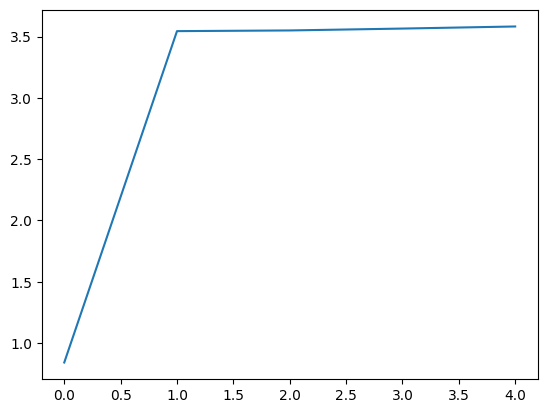

In [308]:
plt.plot(log_prob)

In [287]:
(1/total_mass) * (posterior.T@X)

ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

In [288]:
(densities * prior.T).sum(axis=1)

array([0.02265839, 0.01682302, 0.01489705, ..., 0.00025121, 0.03384385,
       0.01151249])

In [289]:
densities

array([[9.19185841e-03, 5.18906477e-02, 5.62343747e-03],
       [6.68717793e-03, 3.67033260e-02, 5.42645996e-03],
       [2.19318698e-02, 2.91626985e-02, 3.95851014e-03],
       ...,
       [4.73971825e-04, 4.85080337e-05, 3.44366918e-04],
       [1.39474570e-02, 8.15981922e-02, 5.60952271e-03],
       [2.61380261e-02, 1.57741332e-02, 5.82835843e-03]])

In [290]:
mu

array([[6.1825639 , 7.84632148],
       [2.98870225, 4.84473366],
       [9.64771767, 3.89302182]])

In [291]:
print(cov_b)

[[14.91449734  0.23259146]
 [ 0.23259146  1.07431921]]


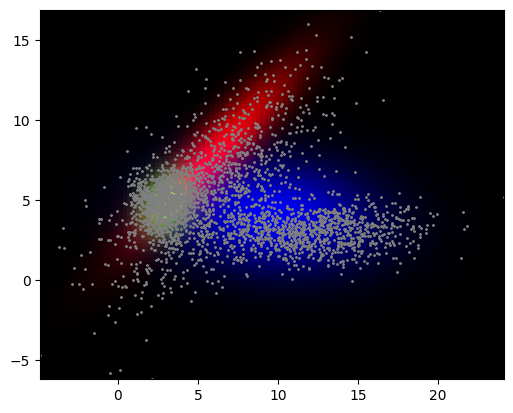

In [292]:
for i in range(e_m_steps):
    plt.scatter(X[:, 0], X[:, 1], c='gray', s=0.3,  alpha=0.9)
    plt.imshow(im[:, :, i, :]/im[:,:,i,:].max(), extent=(*x_extent, *y_extent), origin='lower')
    plt.xlim(*x_extent)
    plt.ylim(*y_extent)
    plt.savefig(f"e_m_{i}.png")

In [293]:
prior

array([0.10347829, 0.36020548, 0.53631624])